In [1]:
from engine.vector_backtest_engine import vector_backtest
from factor_manager.momentum import Momentum
from factor_manager.doubleMA import DoubleMA
from factor_manager.rsi import RSI
from factor_manager.kdj import KDJ
from portfolio_manager.portfolio_template import get_portfolio_pnl
import argparse

In [2]:
def get_args_with_batch_id(batch_id):
    parser = argparse.ArgumentParser()
    parser.add_argument("--factor_name", "-m", default="Momentum", help="factor name")
    parser.add_argument("--model_id", type=str, default="equal_weight", help="Model id")
    parser.add_argument("--signal_method", type=str, default="equal_weight", help="equal_weight or prediction in creating signal")
    parser.add_argument("--back_window", type=int, default=60, help="Number of trading days for train data")
    parser.add_argument("--with_pca", type=bool, default=False, help="PCA in model training")
    parser.add_argument("--trade_type", type=str, default='long_short', help="long only or long short in signal evaluation")
    parser.add_argument("--upper_bound", type=float, default=0.5, help="upper bound of signal to weight")
    parser.add_argument("--lower_bound", type=float, default=0.5, help="lower bound of signal to weight")
    parser.add_argument("--target", type=str, default="tag_raw", help="tag_raw or tag_ranked in model prediction")
    args = parser.parse_args()

    if batch_id == 1:
        args.model_id = 'equal_weight'
        args.signal_method = 'equal_weight' 
    elif batch_id == 2:
        args.model_id = 'OLSLRModel'
        args.signal_method = 'prediction'    
        args.with_pca = False
        args.target = 'tag_raw'
    elif batch_id == 3:
        args.model_id = 'OLSLRModel_PCA'
        args.signal_method = 'prediction'
        args.with_pca = True
        args.target = 'tag_raw'
    elif batch_id == 4:
        args.model_id = 'OLSLRModel_tag_ranked'
        args.signal_method = 'prediction' 
        args.with_pca = False
        args.target = 'tag_ranked'  
    elif batch_id == 5:
        args.model_id = 'OLSLRModel_PCA_tag_ranked'
        args.signal_method = 'prediction' 
        args.with_pca = True
        args.target = 'tag_ranked'  
    return args

高相关因子融合

2023-12-28 17:06:58.886 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet
2023-12-28 17:06:58.889 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105      20040106      20040107     20040108
close          1011.347      1060.801      1075.656      1086.303     1102.662
open            996.996      1008.279      1059.141      1075.562      1087.68
high           1021.568      1060.898      1086.694      1095.841     1108.291
low             993.892      1008.279      1059.095       1070.98     1082.509
pre_close        1000.0      1011.347      1060.801      1075.656     1086.303
change           11.347        49.454        14.855        10.647       16.359
pct_chg          1.1347        4.8

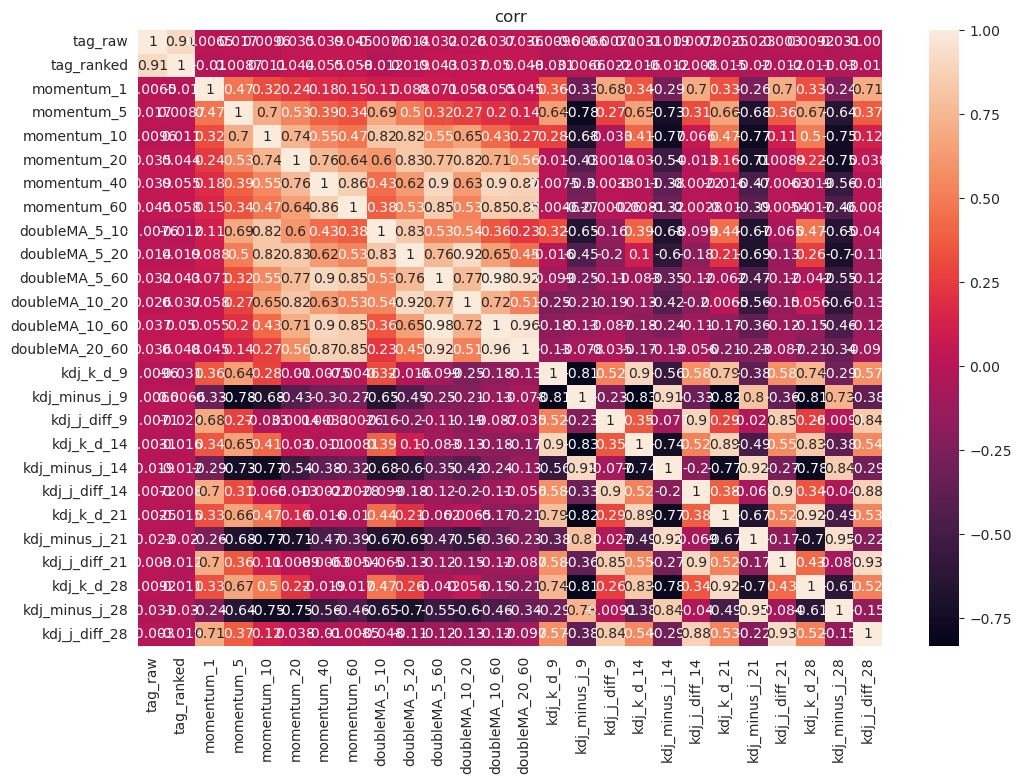

2023-12-28 17:07:00.358 | INFO     | engine.vector_backtest_engine:vector_backtest:141 -                                000016.SH_benchmark  000016.SH_equal_weight
annualized return                         0.075339                0.077855
sharpe ratio                              0.291962                0.303334
win ratio                                 0.502988                0.494785
win per loss                              1.042277                1.079718
annualized turnover(buy side)                  NaN               63.272503
annualized costs                               NaN                0.029105


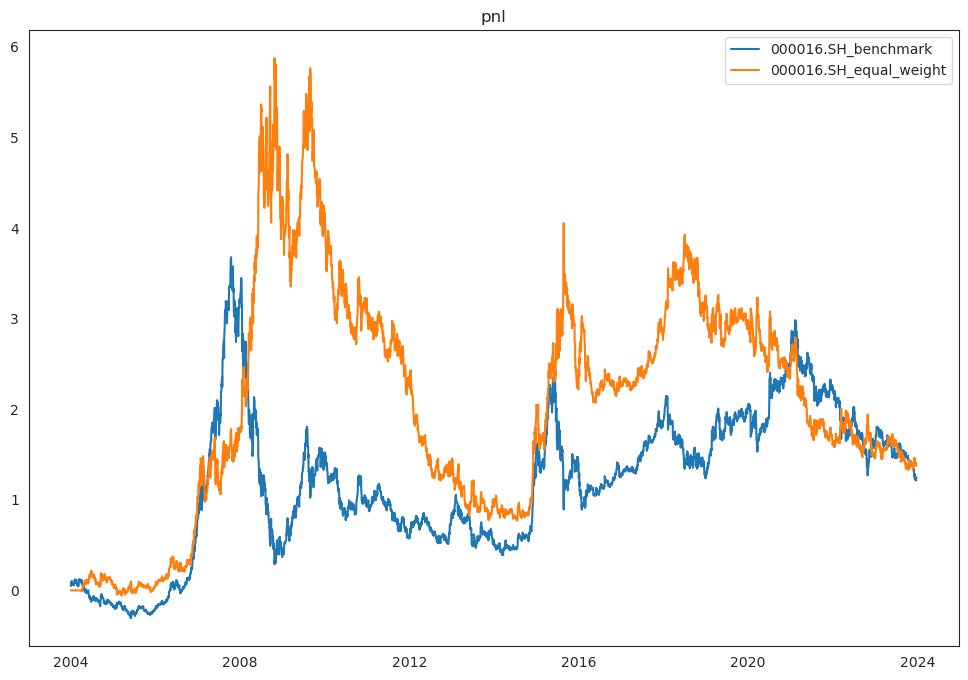

2023-12-28 17:07:00.590 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000300.parquet
2023-12-28 17:07:00.591 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1           2            3           4
ts_code       000300.SH    000300.SH   000300.SH    000300.SH   000300.SH
trade_date     20050104     20050105    20050106     20050107    20050110
close           982.794      992.564     983.174      983.958     993.879
open            994.769      981.577     993.331      983.045      983.76
high            994.769      997.323     993.788      995.711     993.959
low             980.658      979.877      980.33      979.812     979.789
pre_close        1000.0      982.794     992.564      983.174     983.958
change          -17.206         9.77       -9.39        0.784       9.921
pct_chg         -1.7206       0.9941      -0.946       0.0797      1.0083
vol  

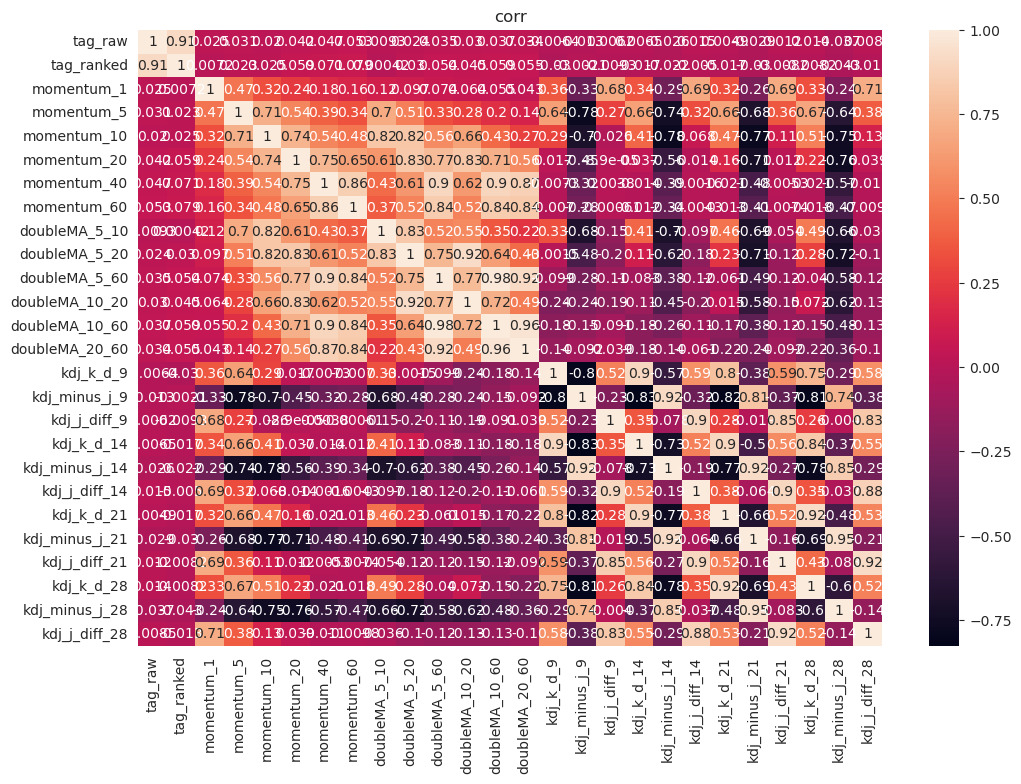

2023-12-28 17:07:01.880 | INFO     | engine.vector_backtest_engine:vector_backtest:141 -                                000300.SH_benchmark  000300.SH_equal_weight
annualized return                         0.100325                0.124648
sharpe ratio                              0.388583                0.485308
win ratio                                 0.525380                0.508679
win per loss                              0.969576                1.055730
annualized turnover(buy side)                  NaN               62.726800
annualized costs                               NaN                0.028854


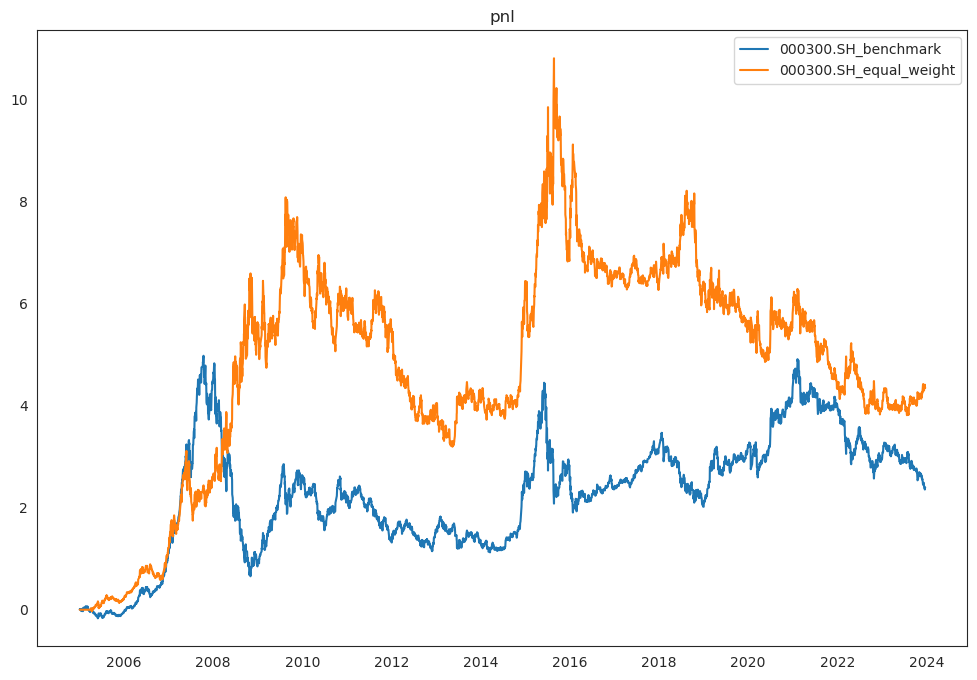

2023-12-28 17:07:02.165 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000905.parquet
2023-12-28 17:07:02.167 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1            2            3            4
ts_code       000905.SH    000905.SH    000905.SH    000905.SH    000905.SH
trade_date     20050104     20050105     20050106     20050107     20050110
close           986.927     1003.633      994.595      997.606     1006.337
open            996.682       986.57      1003.49      993.434      996.928
high            996.682     1008.855      1003.49       1009.0     1006.457
low             984.795      985.677      990.792      990.446      993.123
pre_close        1000.0      986.927     1003.633      994.595      997.606
change          -13.073       16.706       -9.038        3.011        8.731
pct_chg         -1.3073       1.6927      -0.9005       0.302

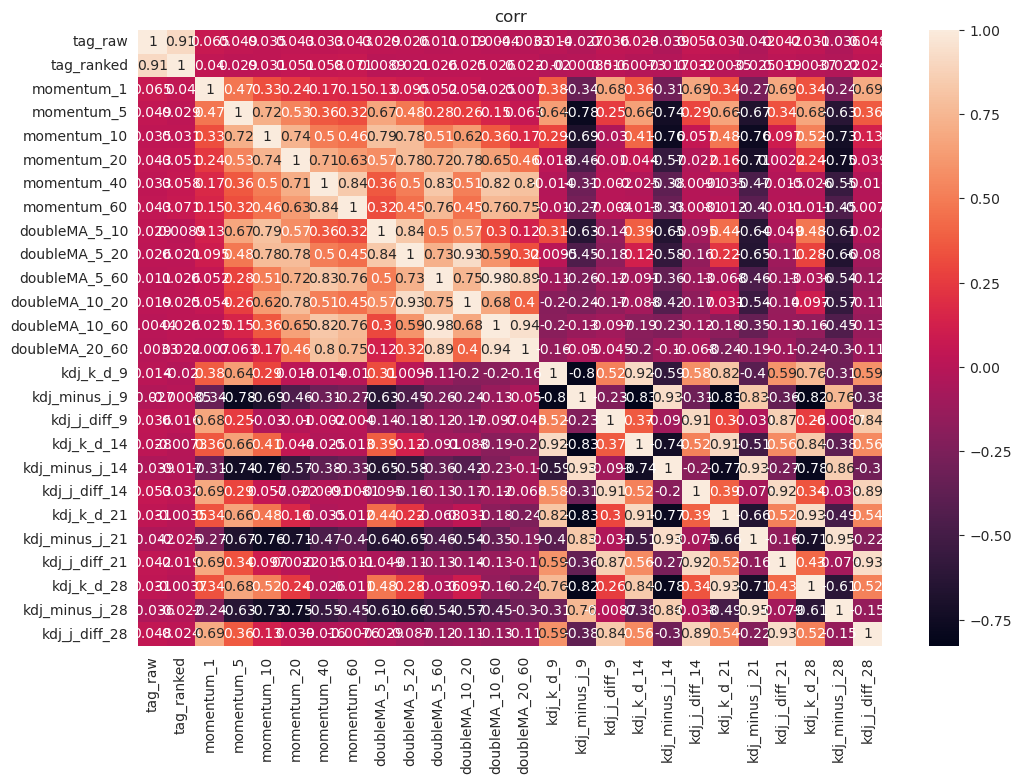

2023-12-28 17:07:03.903 | INFO     | engine.vector_backtest_engine:vector_backtest:141 -                                000905.SH_benchmark  000905.SH_equal_weight
annualized return                         0.135136                0.242814
sharpe ratio                              0.462162                0.835505
win ratio                                 0.553796                0.523182
win per loss                              0.875335                1.059958
annualized turnover(buy side)                  NaN               63.382480
annualized costs                               NaN                0.029156


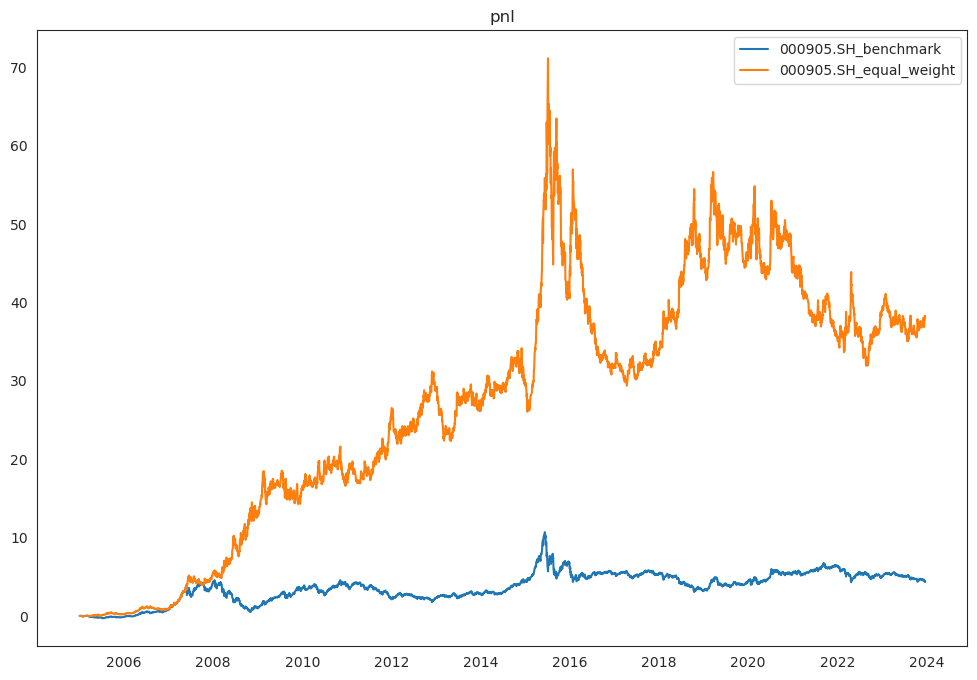

2023-12-28 17:07:04.412 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000852.parquet
2023-12-28 17:07:04.414 | INFO     | data_manager.data_loader:load_data_by_file:16 -                      0          1           2           3           4
ts_code      000852.SH  000852.SH   000852.SH   000852.SH   000852.SH
trade_date    20050104   20050105    20050106    20050107    20050110
close          989.984   1013.583    1005.465     1011.74    1023.638
open           996.278    989.873    1014.965    1005.515    1011.925
high           996.278   1018.261    1014.965    1021.706    1023.638
low            982.988    988.568    1001.213    1001.096    1007.802
pre_close       1000.0    989.984    1013.583    1005.465     1011.74
change         -10.016     23.599      -8.118       6.275      11.898
pct_chg        -1.0016     2.3838     -0.8009      0.6241       1.176
vol          494737.55  822661.44   732454.01

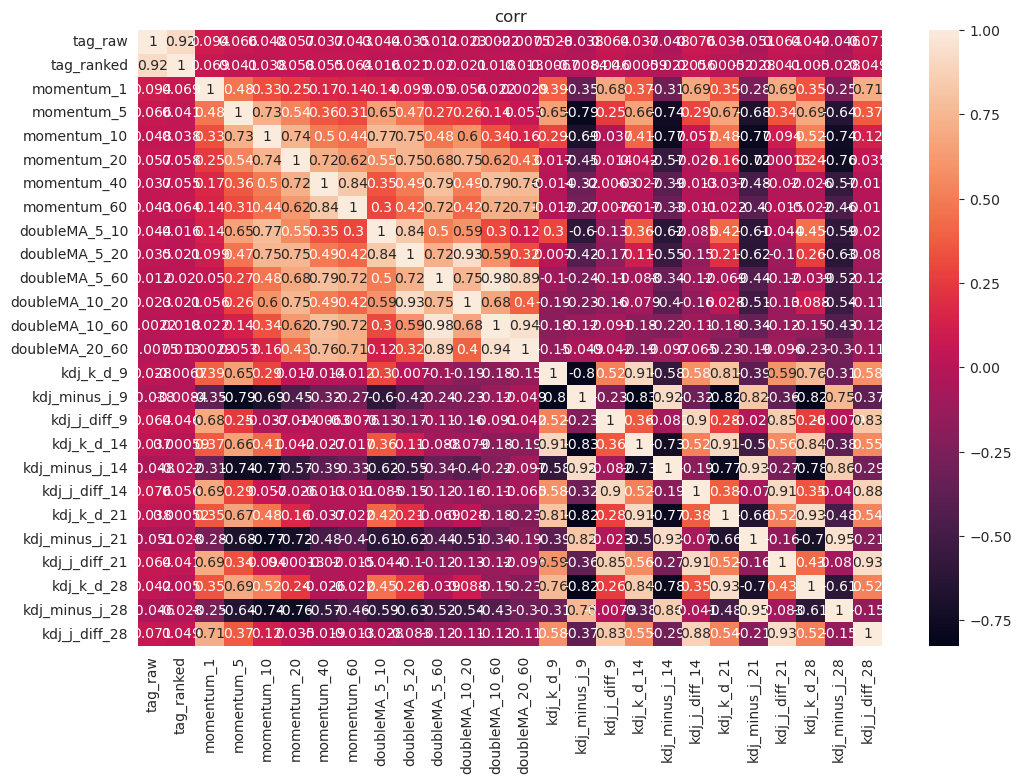

2023-12-28 17:07:05.983 | INFO     | engine.vector_backtest_engine:vector_backtest:141 -                                000852.SH_benchmark  000852.SH_equal_weight
annualized return                         0.142447                0.332205
sharpe ratio                              0.469628                1.104389
win ratio                                 0.560304                0.537464
win per loss                              0.852614                1.047724
annualized turnover(buy side)                  NaN               58.300954
annualized costs                               NaN                0.026818


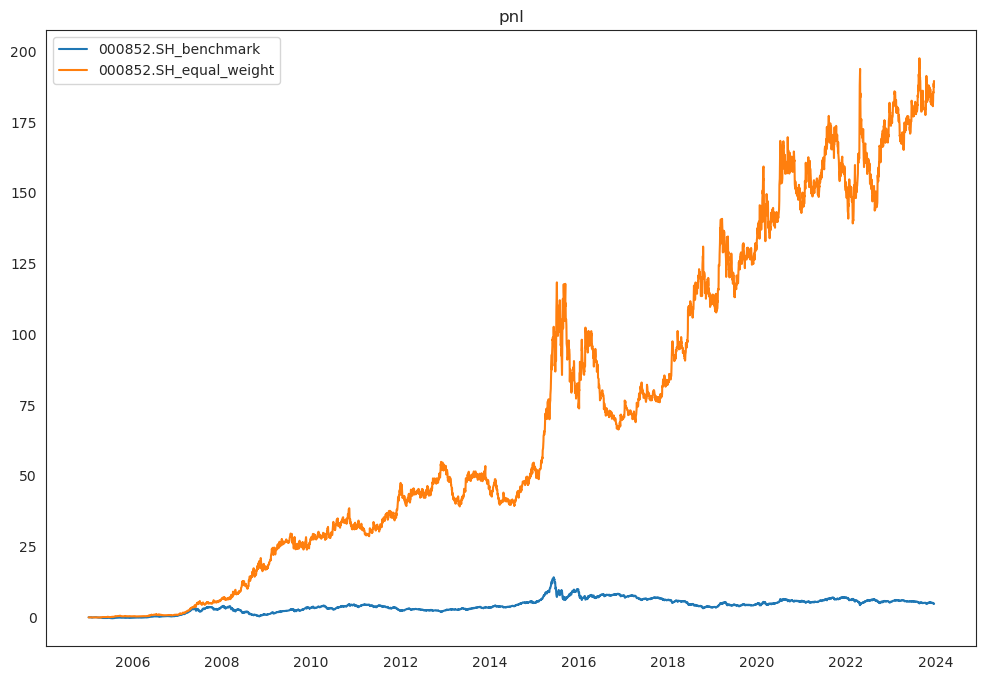

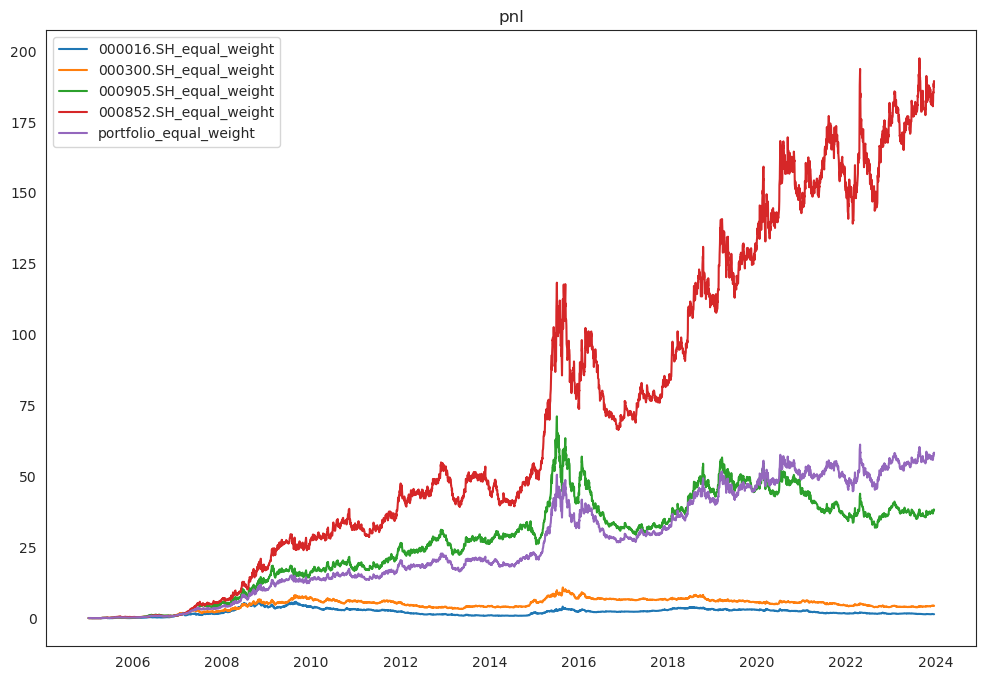

In [3]:
factor_classes = [Momentum, DoubleMA, KDJ]
contracts = ['000016.SH', '000300.SH', '000905.SH', '000852.SH']
args_list = [get_args_with_batch_id(batch_id) for batch_id in [1]]
dict_signal, dict_pnl = vector_backtest(factor_classes, contracts, args_list)
get_portfolio_pnl(dict_pnl, contracts, chosen_model_id = 'equal_weight')